There are 37 number of transcripts that are stimulated by pulse for collectionTime_12.pulseConditionsNoZeros.csv out of 73
There are 37 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for collectionTime_12.pulseConditionsNoZeros.csv out of 73
There are 163 number of transcripts that are stimulated by pulse for collectionTime_3.pulseConditionsNoZeros.csv out of 213
There are 163 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for collectionTime_3.pulseConditionsNoZeros.csv out of 213
There are 36 number of transcripts that are not stimulated by pulse for collectionTime_12.pulseConditionsNoZeros.csv out of 73
There are 50 number of transcripts that are not stimulated by pulse for collectionTime_3.pulseConditionsNoZeros.csv out of 213
There are 50 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for collectionTime_3.pulseConditionsNoZeros.csv out of 50
There are 36 number

0     1.441280e-16
1     5.563220e-16
2     7.728498e-14
3     2.903026e-13
4     1.809290e-11
5     1.838398e-11
6     1.842282e-11
7     5.584096e-11
8     6.216401e-11
9     6.289301e-11
10    8.366305e-11
11    1.337264e-10
12    2.143839e-10
13    1.406388e-05
14    5.359333e-05
15    7.997527e-05
16    1.236966e-04
17    2.288761e-04
18    3.283376e-04
19    6.329604e-04
20    1.478850e-03
21    1.557147e-03
22    2.446723e-03
23    2.523123e-03
24    2.523123e-03
25    3.795251e-03
26    1.584636e-02
27    1.871963e-02
28    2.292095e-02
29    2.840965e-02
30    2.906930e-02
31    2.934798e-02
32    3.026396e-02
33    3.026396e-02
34    4.809609e-02
35    4.849937e-02
36    4.849937e-02
Name: padj, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


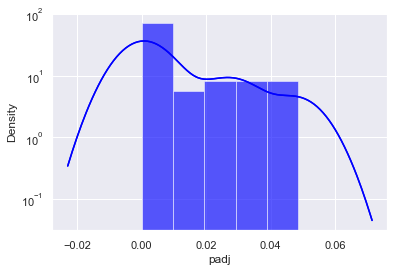

In [44]:
"""
Functions for Filtering Stimulated Pulses



"""
#Function that accepts a csv filename and a column to look in for positive values in the column ('log2fold' in this case) given.
#The function accepts a csv file and a column name in the form of Python strings to search through, and returns a dataframe
#
def pulseStimulationCheckForPositives(csv_filename: str, search_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    positive_log_fold_df = df[df[search_column_name] > 0]
    print("There are " + str(len(positive_log_fold_df.index)) + " number of transcripts that are stimulated by pulse for " 
          + csv_filename + " out of " + str(len(df))) 
    
    return positive_log_fold_df


#Same function as first function, except a significance level (p-value) is given as a threshold and another column is given 
#for the 
#to find statiscially significant data (Data <= the p value)
def pulseStimulationSignificantDataCheck(csv_filename: str, search_column_name: str, p_value: float,
                                         padj_value_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    df_copy = df[(df[padj_value_column_name] <= p_value) & (df[search_column_name] > 0)]
    print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
+ str(p_value) + " or below for " + csv_filename + " out of " + str(len(df.index)))
    
    return df_copy

#Function that checks for negatives in a given column ('log2fold' in this case) and returns a dataframe with the negatives
def NegativeLogFoldChecker(csv_filename: str, search_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    negative_log_fold_df = df[df[search_column_name] <= 0]
    print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
          + csv_filename + " out of " + str(len(df))) 
    
    return negative_log_fold_df

#Same function as the previous one, but with 
def NegativeLogFoldCheckerSignificantDataChecker(csv_filename: str, search_column_name: str,  p_value: float,
                                         padj_value_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    significant_data_negative_log_fold_df = df[(df[search_column_name] <= 0) & (df[padj_value_column_name] <= p_value)]
    print("There are " + str(len(significant_data_negative_log_fold_df.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
+ str(p_value) + " or below for " + csv_filename + " out of " + str(len(significant_data_negative_log_fold_df)))
    
    return significant_data_negative_log_fold_df
    
def CsvFileExporter(df, df_name, index_header):
    import pandas as pd
    return df.to_csv(df_name, index = index_header)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Looking for positive values in the log2fold column
df_zt12_nozeros = pulseStimulationCheckForPositives('collectionTime_12.pulseConditionsNoZeros.csv', 'log2FoldChange')
#display(df_zt12_nozeros)
df1_filtered_zt12_nozeros = pulseStimulationSignificantDataCheck('collectionTime_12.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, "padj")
#display(df1_filtered_zt12_nozeros)

df_zt3_nozeros = pulseStimulationCheckForPositives('collectionTime_3.pulseConditionsNoZeros.csv', 'log2FoldChange')
#display(df_zt3_nozeros)

df1_filtered_zt3_nozeros = pulseStimulationSignificantDataCheck('collectionTime_3.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, 'padj')
#display(df1_filtered_zt3_nozeros)

df_nonfiltered_zt12 = NegativeLogFoldChecker('collectionTime_12.pulseConditionsNoZeros.csv', 'log2FoldChange')
#display(df_nonfiltered_zt12)

df_nonfiltered_zt3 = NegativeLogFoldChecker('collectionTime_3.pulseConditionsNoZeros.csv', 'log2FoldChange')
#display(df_nonfiltered_zt3)

df_negative_log_fold_p_value_zt3 = NegativeLogFoldCheckerSignificantDataChecker('collectionTime_3.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, "padj")
#display(df_negative_log_fold_p_value_zt3)

df_negative_log_fold_p_value_zt12 = NegativeLogFoldCheckerSignificantDataChecker('collectionTime_12.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, "padj")
#display(df_negative_log_fold_p_value_zt12)

CsvFileExporter(df_zt12_nozeros, "df_zt12_nozeros.csv", 'Transcripts')
CsvFileExporter(df1_filtered_zt12_nozeros, "df1_filtered_zt12_nozeros.csv", 'Transcripts')
CsvFileExporter(df_zt3_nozeros, "df_zt3_nozeros.csv" ,'Transcripts')
CsvFileExporter(df1_filtered_zt3_nozeros, "df1_filtered_zt3_nozeros.csv", 'Transcripts')
CsvFileExporter(df_nonfiltered_zt12, "df_nonfiltered_zt12.csv", 'Transcripts')
CsvFileExporter(df_nonfiltered_zt3, "df_nonfiltered_zt3.csv", 'Transcripts')
CsvFileExporter(df_negative_log_fold_p_value_zt3, 'df_negative_log_fold_p_value_zt3', 'Transcripts')
CsvFileExporter(df_negative_log_fold_p_value_zt12, 'df_negative_log_fold_p_value_zt12', 'Transcripts')

padj = df_zt12_nozeros.padj
padj = padj.reset_index(drop = True)
padj1 = df_zt3_nozeros.padj
padj1 = padj1.reset_index(drop = True)
padj2 = df1_filtered_zt12_nozeros.padj
padj2 = padj2.reset_index(drop = True)
display(padj)
#plt.plot(padj)
#plt.plot(df_zt12_nozeros.index, df1_filtered_zt12_nozeros.padj)
#plt.xticks(padj)
sns.distplot(padj, color = 'blue')
graph = sns.distplot(padj, color = 'blue')
plt.yscale('log')
plt.show()



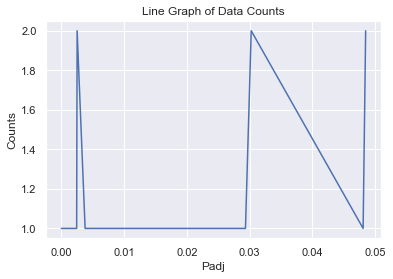

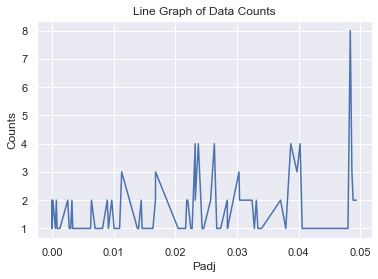

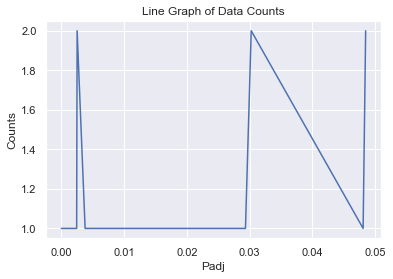

In [39]:
import pandas as pd
def plot_line_graph(data):
    value_counts = data.value_counts().sort_index()
    unique_values = value_counts.index
    counts = value_counts.values
    plt.plot(unique_values, counts)
    plt.xlabel('Padj')
    plt.ylabel('Counts')
    plt.title('Line Graph of Data Counts')
    plt.grid(True)
    plt.show()
# Example usage
#data = pd.Series([1, 2, 3, 2, 1, 1, 4, 5, 2, 3, 1, 3, 3])
plot_line_graph(padj)
plot_line_graph(padj1)
plot_line_graph(padj2)

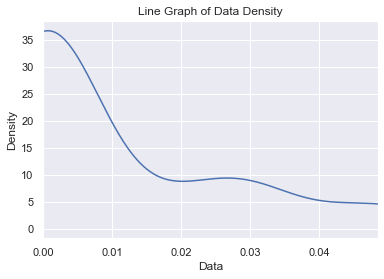

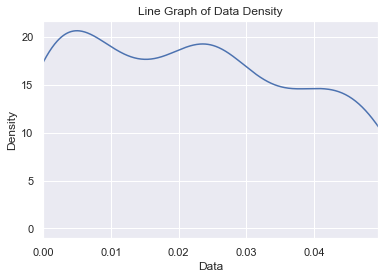

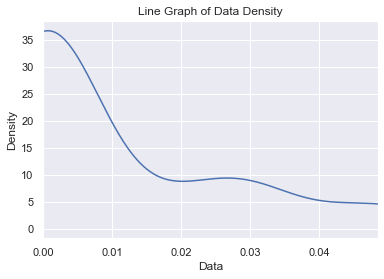

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_line_graph(data):
    data.plot.density()
    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.title('Line Graph of Data Density')
    plt.xlim(data.min(),data.max())
    plt.grid(True)
    plt.show()
# Example usage
#data = pd.Series([1, 2, 3, 2, 1, 1, 4, 5, 2, 3, 1, 3, 3])
plot_line_graph(padj)
plot_line_graph(padj1)
plot_line_graph(padj2)
#plt.show()


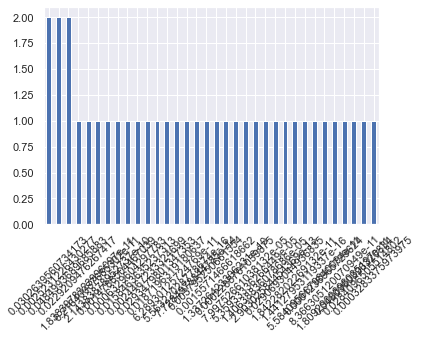

In [18]:
#sns.histplot(df_zt12_nozeros.padj, color = 'red')
#sns.histplot(df1_filtered_zt12_nozeros.padj, color = 'blue')
import scipy.stats as stats
(df_zt12_nozeros.padj.value_counts().plot(kind = 'bar'))
density = stats.gaussian_kde(df_zt12_nozeros.padj)
plt.plot()
plt.xticks(rotation = 45)
plt.show()

In [10]:
# Sorry, I was exploring classes since both functions have aspects that are the same
class pulseCheck():
    import pandas as pd
    def __init__(self, csv_filename):
        self.csv_filename = csv_filename
        
    def pulseStimulationCheck(self, search_column_name):
        import pandas as pd
        df = pd.read_csv(self.csv_filename, index_col=0)
        df_copy = df[df[search_column_name] > 0]
        print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse.")
        return df_copy
    
    def pulseStimulationSignificantDataCheck(self, search_column_name: str, p_value: float,
                                         padj_value_column_name: str):
        df = pd.read_csv(csv_filename, index_col=0)
        df_copy = df[(df[padj_value_column_name] <= p_value) & (df[search_column_name] > 0)]
        print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
    + str(p_value) + " or below for " + csv_filename + " out of " + str(len(df.index)))

        return df_copy
    
    def NegativeLogFoldChecker(self, search_column_name: str):
        import pandas as pd
        df = pd.read_csv(csv_filename, index_col=0)
        negative_log_fold_df = df[df[search_column_name] <= 0]
        print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
              + csv_filename + " out of " + str(len(df))) 

        return negative_log_fold_df

    def NegativeLogFoldCheckerSignificantDataChecker(self, search_column_name: str,  p_value: float,
                                             padj_value_column_name: str):
        import pandas as pd
        df = pd.read_csv(csv_filename, index_col=0)
        negative_log_fold_df = df[(df[search_column_name] <= 0) & (df[padj_value_column_name] <= p_value)]
        print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
              + csv_filename + " out of " + str(len(df))) 

        return negative_log_fold_df

    def CsvFileExporter(self, df, df_name, index_header):
        import pandas as pd
        return df.to_csv(df_name, index = index_header)

df = pulseCheck('C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv')
df_zt12_nozeros = df.pulseStimulationCheck('log2FoldChange')


There are 37 number of transcripts that are stimulated by pulse.


In [2]:
df_zt12_nozeros = pulseStimulationCheckForPositives('collectionTime_12.pulseConditionsNoZeros.csv', 'log2FoldChange')

There are 37 number of transcripts that are stimulated by pulse for collectionTime_12.pulseConditionsNoZeros.csv out of 73
